In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import requests


In [5]:
df = pd.read_csv('~/Desktop/data/ipl2023database.csv')

In [6]:
df

,Match Number,Date,Venue,Team1,Team2,Toss winning team,Toss Decision,First batting team,Second batting team,First Innings Score,Overs in First innings,Second Innings Score,Overs in Second innings,Winning Team,Won By
0,63,"16th May 2023, Tuesday",Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Mumbai Indians,Lucknow Super Giants,MI,bowl,LSG,MI,177/3,20.0,172/5,20.0,Lucknow Super Giants,5 runs.
1,62,"15th May 2023, Monday","Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Sunrisers Hyderabad,SRH,bowl,GT,SRH,188/9,20.0,154/9,20.0,Gujarat Titans,34 runs.
2,61,"14th May 2023, Sunday","MA Chidambaram Stadium, Chennai",Chennai Super Kings,Kolkata Knight Riders,CSK,bat,CSK,KKR,144/6,20.0,147/4,18.3,Kolkata Knight Riders,6 wickets
3,60,"14th May 2023, Sunday","Sawai Mansingh Stadium, Jaipur",Rajasthan Royals,Royal Challengers Bangalore,RCB,bat,RCB,RR,171/5,20.0,59/10,10.3,Royal Challengers Bangalore,112 runs.
4,59,"13th May 2023, Saturday","Arun Jaitley Stadium, Delhi",Delhi Capitals,Punjab Kings,DC,bowl,PBKS,DC,167/7,20.0,136/8,20.0,Punjab Kings,31 runs.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,5,"2nd April 2023, Sunday","M.Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Mumbai Indians,RCB,bowl,MI,RCB,171/7,20.0,172/2,16.2,Royal Challengers Bangalore,8 wickets
59,4,"2nd April 2023, Sunday","Rajiv Gandhi International Stadium, Uppal, H...",Sunrisers Hyderabad,Rajasthan Royals,SRH,bowl,RR,SRH,203/5,20.0,131/8,20.0,Rajasthan Royals,72 runs.
60,3,"1st April 2023, Saturday",Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Delhi Capitals,DC,bowl,LSG,DC,193/6,20.0,143/9,20.0,Lucknow Super Giants,50 runs.
61,2,"1st April 2023, Saturday","Punjab Cricket Association IS Bindra Stadium, ...",Punjab Kings,Kolkata Knight Riders,KKR,bowl,PBKS,KKR,191/5,20.0,146/7,16.0,Punjab Kings,7 runs (DLS Method).


In [7]:
df.head()

,Match Number,Date,Venue,Team1,Team2,Toss winning team,Toss Decision,First batting team,Second batting team,First Innings Score,Overs in First innings,Second Innings Score,Overs in Second innings,Winning Team,Won By
0,63,"16th May 2023, Tuesday",Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Mumbai Indians,Lucknow Super Giants,MI,bowl,LSG,MI,177/3,20.0,172/5,20.0,Lucknow Super Giants,5 runs.
1,62,"15th May 2023, Monday","Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Sunrisers Hyderabad,SRH,bowl,GT,SRH,188/9,20.0,154/9,20.0,Gujarat Titans,34 runs.
2,61,"14th May 2023, Sunday","MA Chidambaram Stadium, Chennai",Chennai Super Kings,Kolkata Knight Riders,CSK,bat,CSK,KKR,144/6,20.0,147/4,18.3,Kolkata Knight Riders,6 wickets
3,60,"14th May 2023, Sunday","Sawai Mansingh Stadium, Jaipur",Rajasthan Royals,Royal Challengers Bangalore,RCB,bat,RCB,RR,171/5,20.0,59/10,10.3,Royal Challengers Bangalore,112 runs.
4,59,"13th May 2023, Saturday","Arun Jaitley Stadium, Delhi",Delhi Capitals,Punjab Kings,DC,bowl,PBKS,DC,167/7,20.0,136/8,20.0,Punjab Kings,31 runs.


In [8]:
column= df.columns

In [9]:
column

Index(['Match Number', 'Date', 'Venue', 'Team1', 'Team2', 'Toss winning team',
       'Toss Decision', 'First batting team', 'Second batting team',
       'First Innings Score', 'Overs in First innings', 'Second Innings Score',
       'Overs in Second innings', 'Winning Team', 'Won By'],
      dtype='object')

In [10]:
df.shape

(63, 15)

In [11]:
len(df.columns)

15

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Match Number             63 non-null     int64  
 1   Date                     63 non-null     object 
 2   Venue                    63 non-null     object 
 3   Team1                    63 non-null     object 
 4   Team2                    63 non-null     object 
 5   Toss winning team        63 non-null     object 
 6   Toss Decision            63 non-null     object 
 7   First batting team       63 non-null     object 
 8   Second batting team      63 non-null     object 
 9   First Innings Score      63 non-null     object 
 10  Overs in First innings   63 non-null     float64
 11  Second Innings Score     62 non-null     object 
 12  Overs in Second innings  62 non-null     float64
 13  Winning Team             63 non-null     object 
 14  Won By                   62 

In [15]:
df.dropna(inplace=True)


In [16]:

df.fillna(0, inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 62
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Match Number             62 non-null     int64  
 1   Date                     62 non-null     object 
 2   Venue                    62 non-null     object 
 3   Team1                    62 non-null     object 
 4   Team2                    62 non-null     object 
 5   Toss winning team        62 non-null     object 
 6   Toss Decision            62 non-null     object 
 7   First batting team       62 non-null     object 
 8   Second batting team      62 non-null     object 
 9   First Innings Score      62 non-null     object 
 10  Overs in First innings   62 non-null     float64
 11  Second Innings Score     62 non-null     object 
 12  Overs in Second innings  62 non-null     float64
 13  Winning Team             62 non-null     object 
 14  Won By                   62 non-n

In [30]:
teams = pd.concat([df['Team1'], df['Team2']])


In [33]:
team_counts = teams.value_counts()


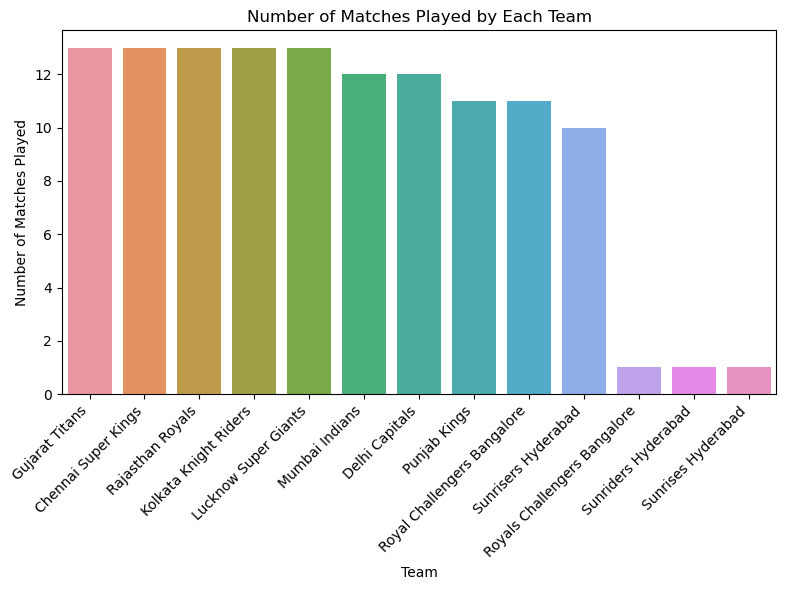

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(x=team_counts.index, y=team_counts.values)
plt.title('Number of Matches Played by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches Played')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [36]:
venue_counts = df['Venue'].value_counts()


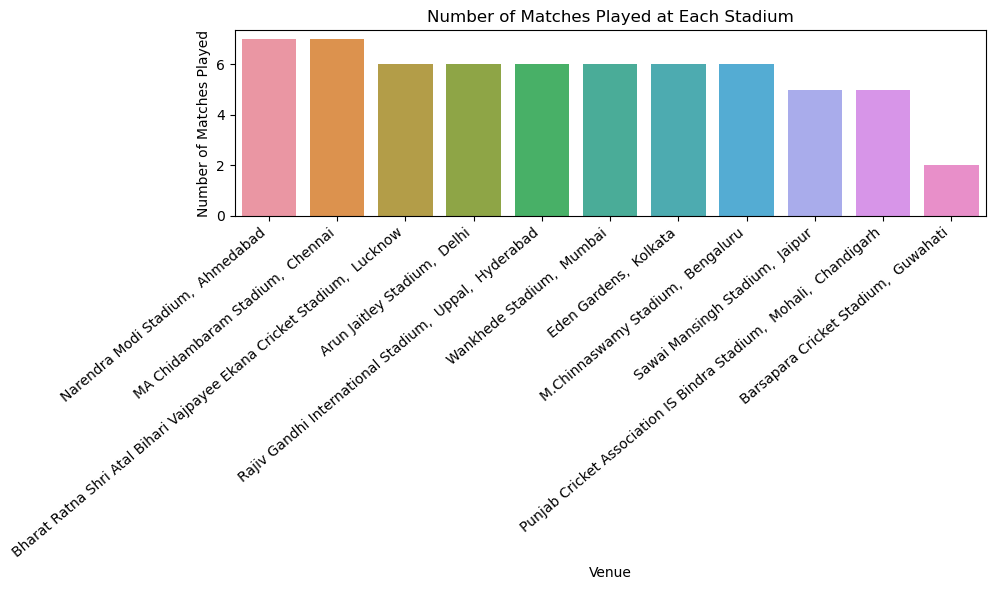

In [127]:
plt.figure(figsize=(10, 6))
sns.barplot(x=venue_counts.index, y=venue_counts.values)
plt.title('Number of Matches Played at Each Stadium')
plt.xlabel('Venue')
plt.ylabel('Number of Matches Played')
plt.xticks(rotation=40, ha='right')  
plt.tight_layout()
plt.show()


In [47]:
team_win_counts = df['Winning Team'].value_counts()


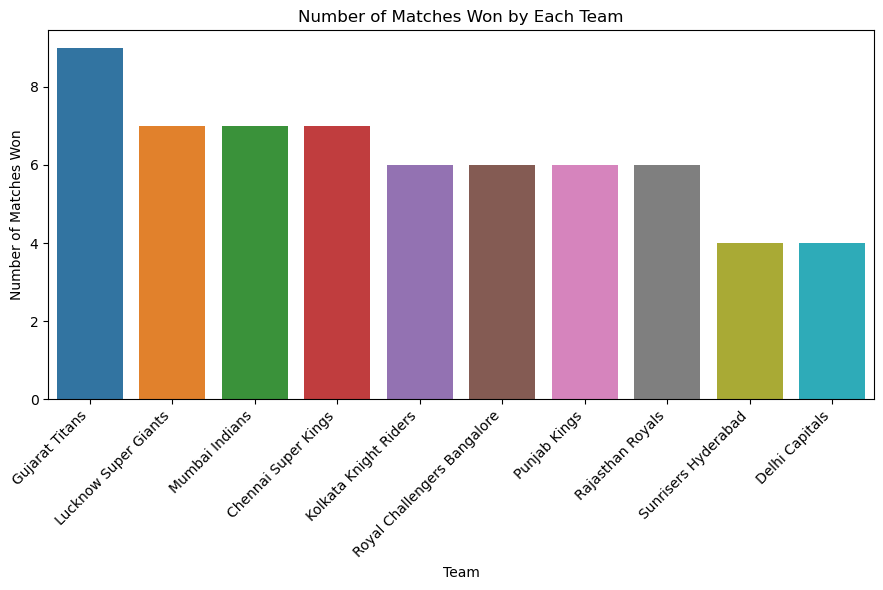

In [49]:
plt.figure(figsize=(9, 6))
sns.barplot(x=team_win_counts.index, y=team_win_counts.values)
plt.title('Number of Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

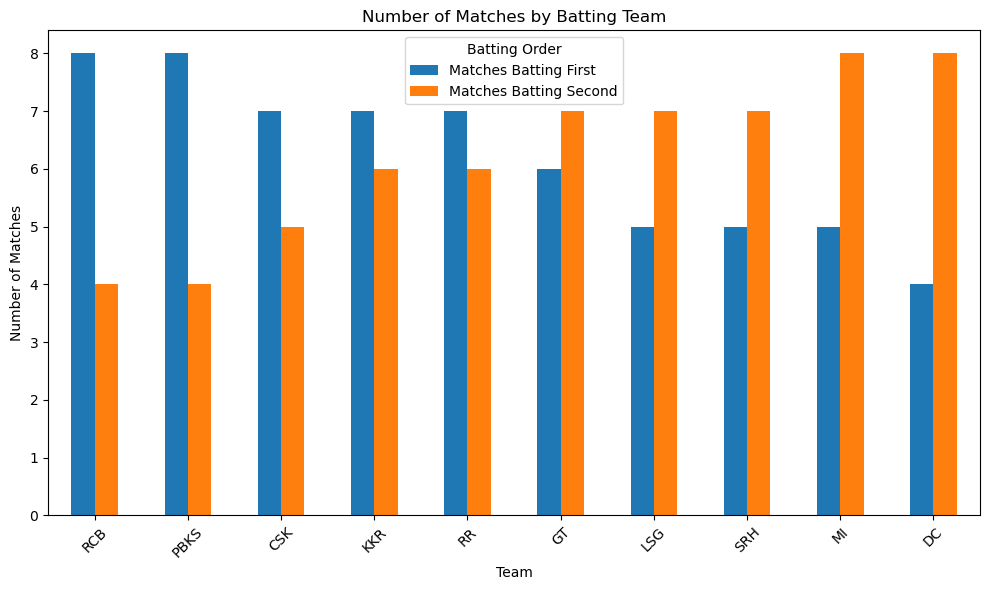

In [64]:
first_batting_counts = df['First batting team'].value_counts()
second_batting_counts = df['Second batting team'].value_counts()
batting_counts_df = pd.concat([first_batting_counts, second_batting_counts], axis=1)
batting_counts_df.columns = ['Matches Batting First', 'Matches Batting Second']

batting_counts_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.title('Number of Matches by Batting Team')
plt.xticks(rotation=45)
plt.legend(title='Batting Order')
plt.tight_layout()
plt.show()

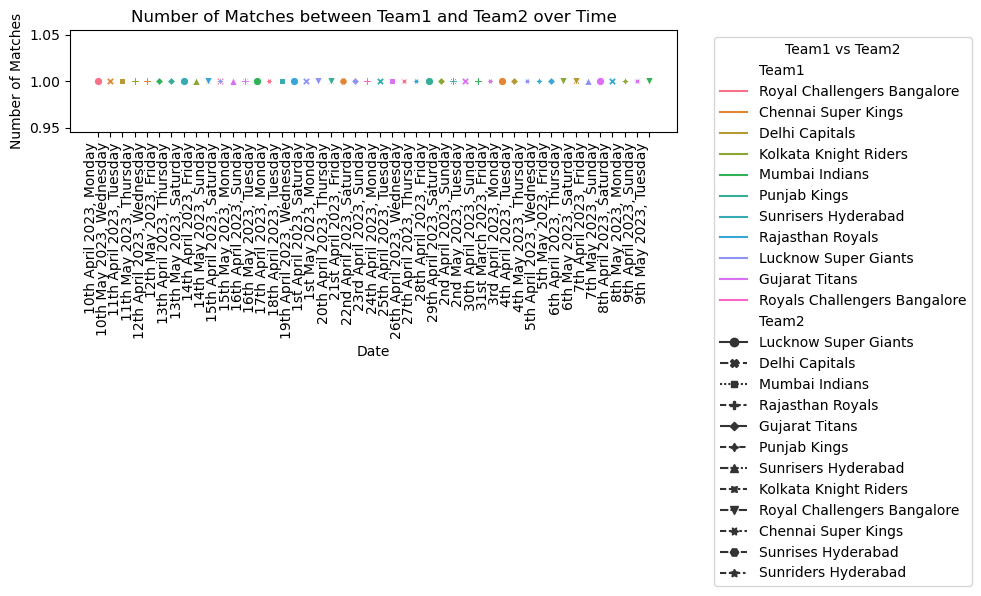

In [77]:
matches_count = df.groupby(['Date', 'Team1', 'Team2']).size().reset_index(name='Matches')


plt.figure(figsize=(10, 4))  
sns.lineplot(data=matches_count, x='Date', y='Matches', hue='Team1', style='Team2', markers=True)
plt.xlabel('Date')
plt.ylabel('Number of Matches')
plt.title('Number of Matches between Team1 and Team2 over Time')
plt.xticks(rotation=90, ha='right')  
plt.legend(title='Team1 vs Team2', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()
plt.show()

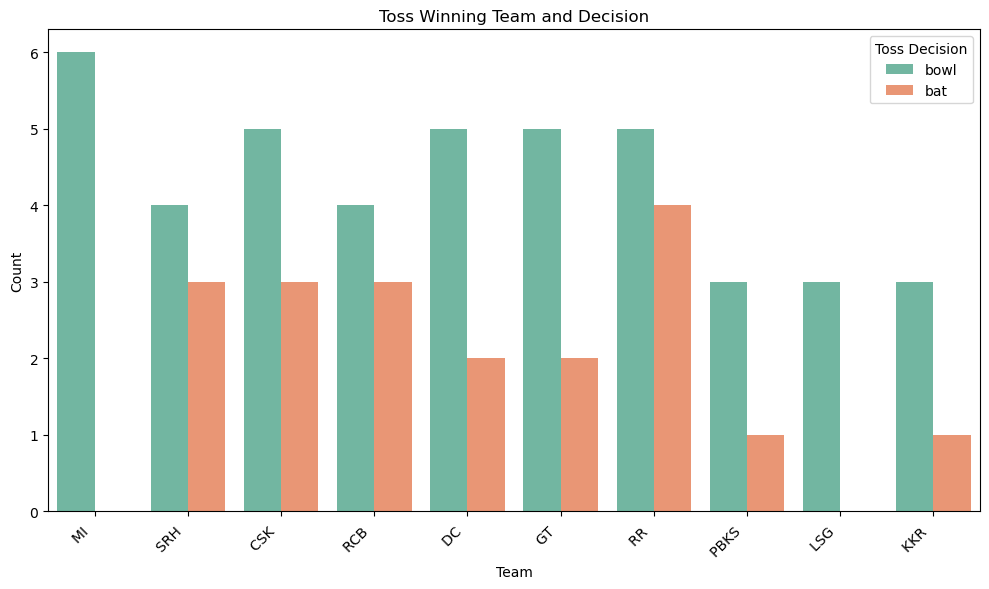

In [99]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Toss winning team', hue='Toss Decision', data=df, palette='Set2')
plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Toss Winning Team and Decision')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Toss Decision')
plt.tight_layout()
plt.show()

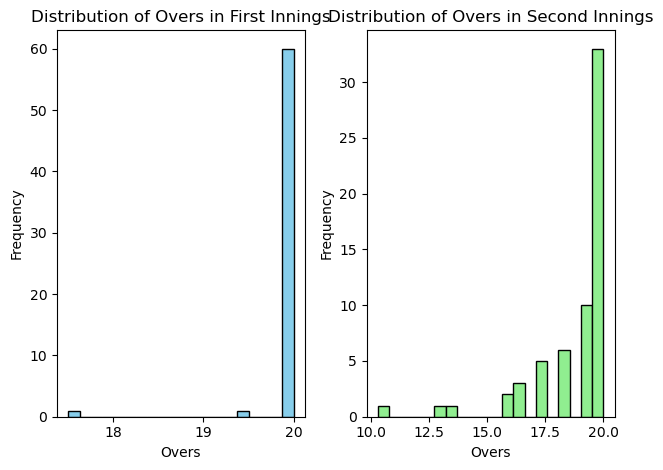

In [100]:
plt.subplot(1, 2, 1)
plt.hist(df['Overs in First innings'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Overs')
plt.ylabel('Frequency')
plt.title('Distribution of Overs in First Innings')

plt.subplot(1, 2, 2)
plt.hist(df['Overs in Second innings'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Overs')
plt.ylabel('Frequency')
plt.title('Distribution of Overs in Second Innings')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

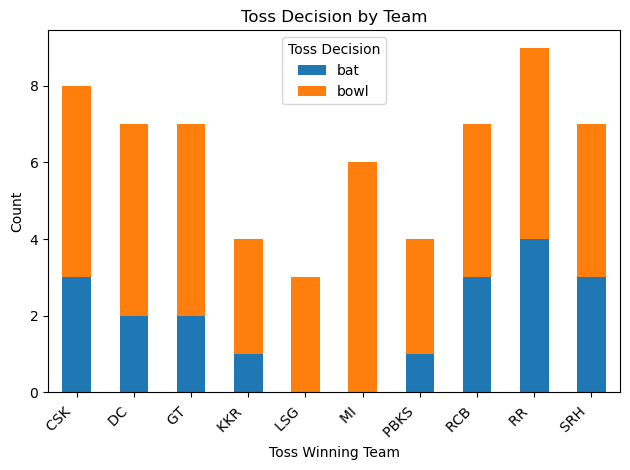

In [104]:
toss_decision_counts = df.groupby(['Toss winning team', 'Toss Decision']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
toss_decision_counts.plot(kind='bar', stacked=True)
plt.xlabel('Toss Winning Team')
plt.ylabel('Count')
plt.title('Toss Decision by Team')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Toss Decision')
plt.tight_layout()
plt.show()

/var/folders/yh/7zf4btw14w38cg6ktjs244080000gn/T/ipykernel_3145/4106702984.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1500x1000 with 0 Axes>

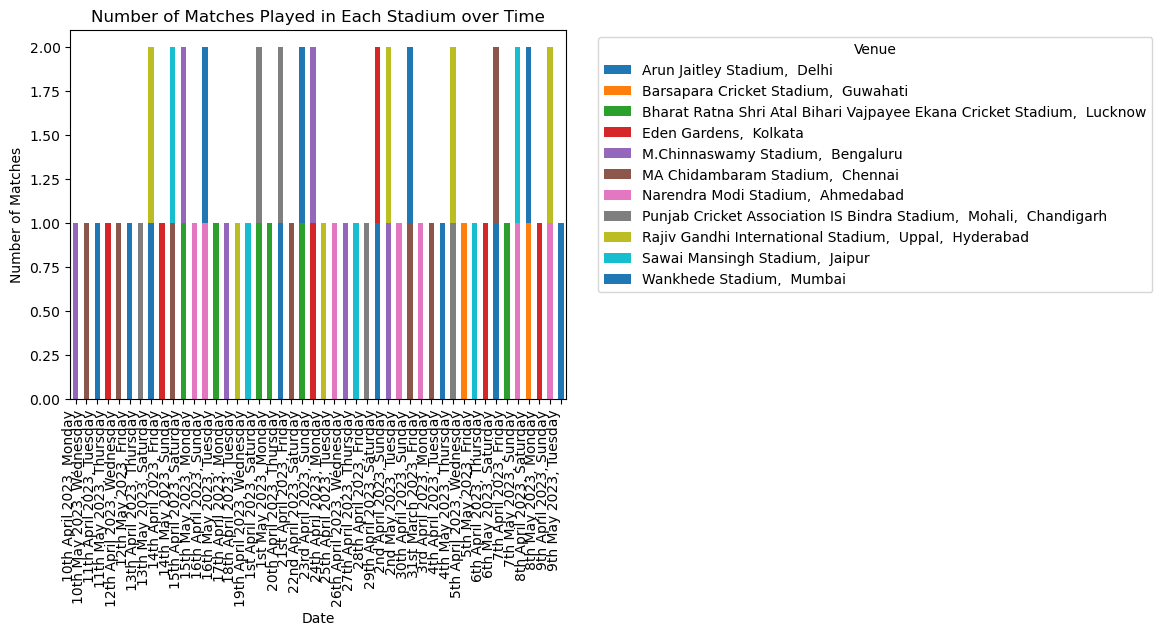

In [129]:
stadium_date_counts = df.groupby(['Date', 'Venue']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(15, 10))
stadium_date_counts.plot(kind='bar', stacked=True)
plt.xlabel('Date')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played in Each Stadium over Time')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Venue', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [131]:
grouped_data = df.groupby(['First Innings Score', 'Overs in First innings', 'Second Innings Score', 'Overs in Second innings']).size().reset_index(name='Count')


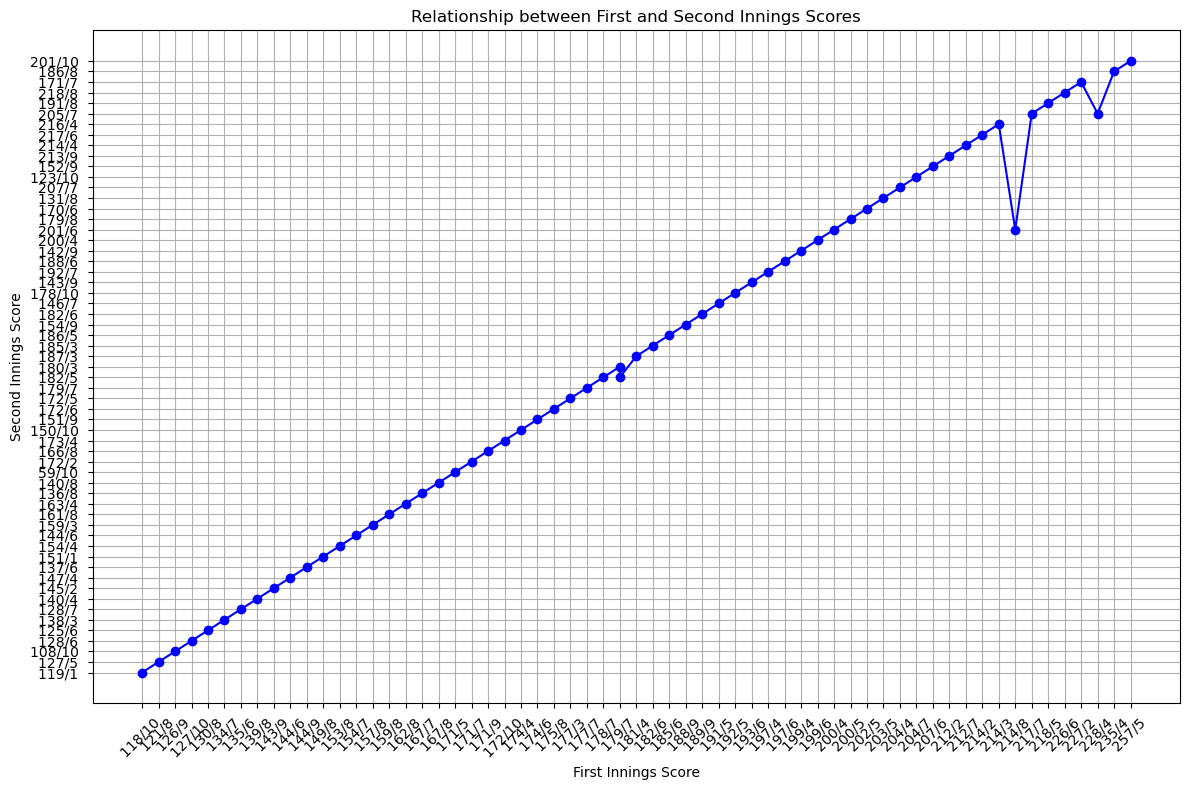

In [143]:
plt.figure(figsize=(12, 8))  # Adjust the figsize as needed
plt.plot(grouped_data['First Innings Score'], grouped_data['Second Innings Score'], marker='o', linestyle='-', color='b')
plt.xlabel('First Innings Score')
plt.ylabel('Second Innings Score')
plt.title('Relationship between First and Second Innings Scores')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.grid(True)
plt.tight_layout()
plt.show()